# 1. Pipelines

In [3]:
pip install quandl

     |████████████████████████████████| 44 kB 968 kB/s eta 0:00:011
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import quandl

In [5]:
import getpass

quandl.ApiConfig.api_key=getpass.getpass()

········


In [8]:
import pandas as pd

companies=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-1/companies.csv')

In [46]:
companies.head(10)

,Ticker,Company
0,AAPL,Apple Inc.
1,NFLX,"Netflix, Inc."
2,AMZN,"Amazon.com, Inc."
3,MSFT,Microsoft Corporation
4,GOOG,Alphabet Inc.
5,TSLA,"Tesla Motors, Inc."
6,FB,"Facebook, Inc."
7,AAP,Advance Auto Parts Inc.
8,DIS,The Walt Disney Company
9,NKE,"NIKE, Inc."


In [10]:
companies.shape

(30, 2)

In [70]:
ticker_list=companies.Ticker.to_list()
ticker_list

['AAPL',
 'NFLX',
 'AMZN',
 'MSFT',
 'GOOG',
 'TSLA',
 'FB',
 'AAP',
 'DIS',
 'NKE',
 'UA',
 'BAC',
 'CCL',
 'CI',
 'AAL',
 'LUV',
 'WFC',
 'WMT',
 'HD',
 'ORCL',
 'IBM',
 'NCLH',
 'RCL',
 'TWX',
 'FOX',
 'F',
 'GCI',
 'XOM',
 'WWE',
 'WM']

In [13]:
print('retrieve data for',ticker_list[0])

retrieve data for AAPL


In [14]:
prices=quandl.get('WIKI/'+ticker_list[0])

In [15]:
prices

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


In [16]:
prices=quandl.get('WIKI/'+ticker_list[0])['Adj. Close']

In [17]:
prices

Date
1980-12-12      0.422706
1980-12-15      0.400652
1980-12-16      0.371246
1980-12-17      0.380362
1980-12-18      0.391536
                 ...    
2018-03-21    171.270000
2018-03-22    168.845000
2018-03-23    164.940000
2018-03-26    172.770000
2018-03-27    168.340000
Name: Adj. Close, Length: 9400, dtype: float64

In [18]:
prices=quandl.get('WIKI/'+ticker_list[0])['Adj. Close'].reset_index()
prices['Ticker']=ticker_list[0]

In [19]:
prices

,Date,Adj. Close,Ticker
0,1980-12-12,0.422706,AAPL
1,1980-12-15,0.400652,AAPL
2,1980-12-16,0.371246,AAPL
3,1980-12-17,0.380362,AAPL
4,1980-12-18,0.391536,AAPL
...,...,...,...
9395,2018-03-21,171.270000,AAPL
9396,2018-03-22,168.845000,AAPL
9397,2018-03-23,164.940000,AAPL
9398,2018-03-26,172.770000,AAPL


In [20]:
def get_tickers():
    companies=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-1/companies.csv')
    ticker_list=companies.Ticker.to_list()
    print('Retrieved', len(ticker_list),'tickers')
    return ticker_list


In [21]:
tickers=get_tickers()

Retrieved 30 tickers


In [25]:
def get_prices(ticker):
    print('retrieve data for',ticker)
    prices=quandl.get('WIKI/'+ticker)['Adj. Close'].reset_index()
    prices['Ticker']=ticker
    return prices

In [26]:
def acquisition():
    tickers=get_tickers() #get the list of companies
    
    data=[get_prices(ticker) for ticker in tickers] #get the list of df with prices
    
    df=pd.concat(data, sort=True)
    return df


In [32]:
df=acquisition()

Retrieved 30 tickers
retrieve data for AAPL
retrieve data for NFLX
retrieve data for AMZN
retrieve data for MSFT
retrieve data for GOOG
retrieve data for TSLA
retrieve data for FB
retrieve data for AAP
retrieve data for DIS
retrieve data for NKE
retrieve data for UA
retrieve data for BAC
retrieve data for CCL
retrieve data for CI
retrieve data for AAL
retrieve data for LUV
retrieve data for WFC
retrieve data for WMT
retrieve data for HD
retrieve data for ORCL
retrieve data for IBM
retrieve data for NCLH
retrieve data for RCL
retrieve data for TWX
retrieve data for FOX
retrieve data for F
retrieve data for GCI
retrieve data for XOM
retrieve data for WWE
retrieve data for WM


In [36]:
def concat_pivot(df, rows='Date', columns='Ticker', values='Adj. Close'):
    pivot=df.pivot_table(values=values, index=rows, columns=columns)
    return pivot

In [37]:
concat_pivot(df)

Ticker,AAL,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,F,FB,...,ORCL,RCL,TSLA,TWX,UA,WFC,WM,WMT,WWE,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141259,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143648,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,54.09,115.24,171.270,1581.86,31.87,67.06,167.05,101.820000,11.10,169.39,...,47.02,123.37,316.53,95.29,14.07,54.79,85.92,88.18,36.30,75.04
2018-03-22,52.31,111.71,168.845,1544.10,30.55,66.20,165.34,100.600000,10.75,164.89,...,45.89,120.18,309.10,94.26,13.71,52.53,84.24,87.14,35.90,73.50
2018-03-23,51.01,110.84,164.940,1495.56,29.17,64.41,164.00,98.540000,10.56,159.39,...,44.79,117.04,301.54,92.57,13.72,50.98,82.90,85.42,35.82,72.89


<AxesSubplot:xlabel='Date'>

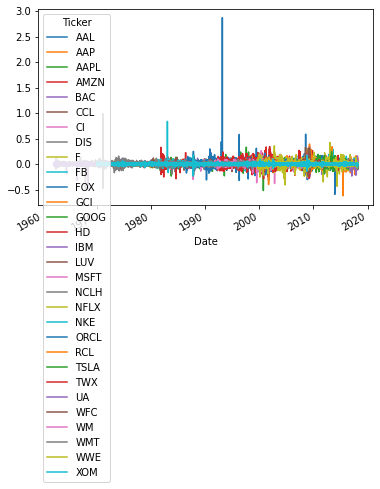

In [38]:
concat_pivot(df).pct_change().plot()

<AxesSubplot:xlabel='Date'>

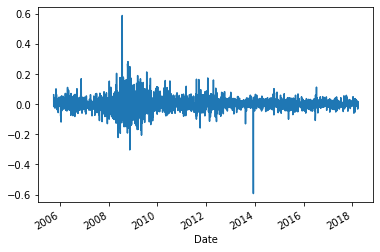

In [39]:
concat_pivot(df).pct_change()['AAL'].plot()

In [40]:
def compute_pct_change(df):
    return df.pct_change()

In [41]:
#Option 1
df=acquisition()
df=concat_pivot(df)
df=compute_pct_change(df)

Retrieved 30 tickers
retrieve data for AAPL
retrieve data for NFLX


KeyboardInterrupt: 

In [42]:
#Option 2: Best
acquisition().pipe(concat_pivot).pipe(compute_pct_change)

Retrieved 30 tickers
retrieve data for AAPL
retrieve data for NFLX
retrieve data for AMZN
retrieve data for MSFT
retrieve data for GOOG
retrieve data for TSLA
retrieve data for FB
retrieve data for AAP
retrieve data for DIS
retrieve data for NKE
retrieve data for UA
retrieve data for BAC
retrieve data for CCL
retrieve data for CI
retrieve data for AAL
retrieve data for LUV
retrieve data for WFC
retrieve data for WMT
retrieve data for HD
retrieve data for ORCL
retrieve data for IBM
retrieve data for NCLH
retrieve data for RCL
retrieve data for TWX
retrieve data for FOX
retrieve data for F
retrieve data for GCI
retrieve data for XOM
retrieve data for WWE
retrieve data for WM


Ticker,AAL,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,F,FB,...,ORCL,RCL,TSLA,TWX,UA,WFC,WM,WMT,WWE,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013423,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003444,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003432,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,-0.022234,0.008665,-0.022655,-0.002931,-0.003440,-0.011643,0.012424,0.004637,0.010009,0.007374,...,-0.000638,-0.011933,0.019256,0.001156,0.004283,-0.002004,-0.004057,0.002615,-0.005207,0.014191
2018-03-22,-0.032908,-0.030632,-0.014159,-0.023871,-0.041418,-0.012824,-0.010236,-0.011982,-0.031532,-0.026566,...,-0.024032,-0.025857,-0.023473,-0.010809,-0.025586,-0.041248,-0.019553,-0.011794,-0.011019,-0.020522
2018-03-23,-0.024852,-0.007788,-0.023128,-0.031436,-0.045172,-0.027039,-0.008105,-0.020477,-0.017674,-0.033356,...,-0.023970,-0.026127,-0.024458,-0.017929,0.000729,-0.029507,-0.015907,-0.019738,-0.002228,-0.008299


In [47]:
acquisition().pipe((concat_pivot, 'df'), 
                   values='Adj. Close', 
                   columns='Date', 
                   rows='Ticker').pipe(compute_pct_change)

Retrieved 30 tickers
retrieve data for AAPL
retrieve data for NFLX
retrieve data for AMZN
retrieve data for MSFT
retrieve data for GOOG
retrieve data for TSLA
retrieve data for FB
retrieve data for AAP
retrieve data for DIS
retrieve data for NKE
retrieve data for UA
retrieve data for BAC
retrieve data for CCL
retrieve data for CI
retrieve data for AAL
retrieve data for LUV
retrieve data for WFC
retrieve data for WMT
retrieve data for HD
retrieve data for ORCL
retrieve data for IBM
retrieve data for NCLH
retrieve data for RCL
retrieve data for TWX
retrieve data for FOX
retrieve data for F
retrieve data for GCI
retrieve data for XOM
retrieve data for WWE
retrieve data for WM


Date,1962-01-02,1962-01-03,1962-01-04,1962-01-05,1962-01-08,1962-01-09,1962-01-10,1962-01-11,1962-01-12,1962-01-15,...,2018-03-14,2018-03-15,2018-03-16,2018-03-19,2018-03-20,2018-03-21,2018-03-22,2018-03-23,2018-03-26,2018-03-27
Ticker,,,,,,,,,,,,,,,,,,,,,
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117583,1.122530,1.105235,1.121384,1.065257,1.130523,1.135538,1.172907,1.213074,1.259528
AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.524346,0.525619,0.526365,0.512902,0.533829,0.486203,0.511458,0.488091,0.505359,0.463699
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.916162,7.857095,7.828671,7.813063,8.053355,8.236060,8.145074,8.067297,8.005383,7.893014
BAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.979799,-0.979713,-0.979531,-0.979300,-0.979843,-0.979853,-0.980215,-0.980496,-0.980435,-0.980281
CCL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.083385,1.078816,1.079888,1.114759,1.121639,1.104173,1.166939,1.208091,1.161629,1.226626
CI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.492234,1.501124,1.520849,1.461038,1.431835,1.491053,1.497583,1.546188,1.563526,1.518485
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.377397,-0.381426,-0.390111,-0.390291,-0.385758,-0.390482,-0.391557,-0.399146,-0.403308,-0.399783
F,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.893936,-0.892774,-0.891611,-0.891506,-0.891564,-0.890984,-0.893141,-0.892835,-0.892399,-0.891002


# 2. Error handling

In [50]:
import requests as r

url='https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/documents/the-html5-breakfast-site.html'
r.get(url)

<Response [200]>

In [52]:
url='http://google.com'
response=r.get(url)

In [53]:
response

<Response [200]>

In [54]:
response.history

[<Response [301]>]

In [55]:
response.history[0].content

b'<HTML><HEAD><meta http-equiv="content-type" content="text/html;charset=utf-8">\n<TITLE>301 Moved</TITLE></HEAD><BODY>\n<H1>301 Moved</H1>\nThe document has moved\n<A HREF="http://www.google.com/">here</A>.\r\n</BODY></HTML>\r\n'

In [ ]:
https://google.com

In [56]:
response=r.get('http://fb.com')

In [57]:
response.history

[<Response [301]>, <Response [301]>]

In [59]:
response.history[0].url

'http://fb.com/'

In [60]:
response.history[1].url

'https://fb.com/'

In [61]:
response.url

'https://www.facebook.com/'

In [62]:
def func(url, headers={}):
    resp=r.get(url, headers=headers)
    if resp:
        return resp.content
    else:
        print('Sorry, there is an error:',resp.status_code, 'somewhere')
        return None

In [64]:
func('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/documents/the-html5-breakfast-site.html')

b'<!DOCTYPE html>\n<html>\n  <head>\n    <title>The HTML5 Breakfast Site</title>\n    <meta charset="UTF-8">\n\n    <style>\n      body {\n        background-color: limegreen;\n        margin: 40px;\n      } \n    </style>\n  </head>\n  <body>\n    <div id="container">\n\n      <nav id="topnav">\n        <a href="https://www.ironhack.com" target="_blank">HOME</a> |\n        <a href="https://www.ironhack.com/en/team" target="_blank">ABOUT US</a> |\n        <a href="https://www.ironhack.com/en/contact" target="_blank">CONTACT US</a>\n      </nav>\n\n      <section id="content">\n        <h1>The Ironhack Breakfast Place</h1>\n        <p>Here you will find all sorts of delicious treats</p>\n        <figure>\n          <img src="breakfast.jpg" width="400" alt="healthy breakfast">\n          <figcaption>CC Image courtesy of Ruth Hartnup on Flickr</figcaption>\n        </figure>\n      </section>\n\n      <footer>\n        <p class="love">Made with love by Ironhack</p>\n      </footer>\n\n   

In [65]:
func('http://google.com')

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="fr"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="5qroLyvLUcHzJHq6Z7VDfw==">(function(){window.google={kEI:\'ffhZX8ffAoT4aZTlltAM\',kEXPI:\'0,202162,1151585,5662,731,223,5104,207,2415,789,10,1226,364,925,574,611,206,383,246,5,304,824,226,648,3451,134,5,176,3,65,308,677,132,151,428,438,112,456,619,18,256,7,624,1119058,1197750,329517,13677,4855,32692,15247,867,17444,11240,9188,8384,1326,3533,1361,9291,3028,2816,1918,5,11033,1808,4020,978,6242,1691,5295,2054,920,873,4200,2776,3646,14528,4516,2778,919,2277,8,2796,1593,1279,2212,532,147,562,541,841,516,1466,57,4257,109,203,1137,2,2063,606,2023,544,1233,520,1946,2220,104,327,1285,15,2927,2247,1812,504,1283,3227,419,2426,7,5599,469,6286,4455,641,599,1850,3685,1742,4929,108,1456,1951,908,2,971,685,1899,2397,7468

## 3.1 Types of errors we can meet

1. Too many redirects
2. Timeout errors
3. SSL error
4. OS error
5. Rate Limitations

In [67]:
from requests.exceptions import SSLError, Timeout, TooManyRedirects, RequestException
from contextlib import closing
from IPython.display import Markdown, display
import warnings

warnings.filterwarnings('ignore')
timeout_glob=0.05
verify_glob=True
allow_glob=False

def printmd(string):
    display(Markdown('**'+string+'**'))
    
def is_good_response(x):
    """
    Returns True if the response seems to be an HTML, False otherwise
    x is response
    """
    content_type=x.headers['Content-Type'].lower()
    return ((x.status_code==200 and content_type is not None and content_type.find('html')>1), x.status_code)

def log_error(e):
    print(e)

def status_handler(status):
    if status<300:
        print('Alles gut!')
    elif status>=400 and status<500:
        print('request has failed due to you mistake bro. Check the link, headers, server and whether you have an access to this page.')
    else:
        print('Yoooo, I have no clue what has happened. But you are stuck, since you didnt receive any output from server')
    return None

def adaptive_scraping(url, timeout=timeout_glob, verify=verify_glob):
    global timeout_glob
    global verify_glob
    global allow_glob
    import requests as r
    try:
        with closing(r.get(url, stream=True, timeout=timeout_glob, verify=verify_glob, allow_redirects=allow_glob)) as resp:
            test1=is_good_response(resp)
            print(resp)
            if test1[0]:
                return resp.content
            else:
                return status_handler(test[1])
    except Timeout as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('We can increase response waiting time. Do you want to continue?')
        ans=input('\n[Yes|No]\t')
        if ans.lower()=='yes':
            timeout_glob*=2
            return adaptive_scraping(url)
        else:
            return None
    except SSLError as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('We can skip verification test. Do you want to continue?')
        ans=input('\n[Yes|No]\t')
        if ans.lower()=='yes':
            verify_glob=False
            return adaptive_scraping(url)
        else:
            return None
    except TooManyRedirects as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('We can increase the number of allowed redirects. Do you want to continue?')
        ans=input('\n[Yes|No]\t')
        if ans.lower()=='yes':
            allow_glob=True
            return adaptive_scraping(url)
        else:
            return None
    except RequestException as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('Unfortunately, we have no clue what to do.  Please try again later. ')
        return None
        

In [68]:
url='https://www.geographics.cz/'
adaptive_scraping(url)

Error during request to https://www.geographics.cz/: HTTPSConnectionPool(host='www.geographics.cz', port=443): Read timed out. (read timeout=0.05)


**We can increase response waiting time. Do you want to continue?**


[Yes|No]	yes
Error during request to https://www.geographics.cz/: HTTPSConnectionPool(host='www.geographics.cz', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError("hostname 'www.geographics.cz' doesn't match either of '*.ebola.cz', 'ebola.cz'")))


**We can skip verification test. Do you want to continue?**


[Yes|No]	yes
Error during request to https://www.geographics.cz/: HTTPSConnectionPool(host='www.geographics.cz', port=443): Read timed out. (read timeout=0.1)


**We can increase response waiting time. Do you want to continue?**


[Yes|No]	yes
<Response [200]>


b'<!DOCTYPE html>\n<html lang="en-US">\n\n<head>\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n\t<title>Geographics.cz </title>\n\t<meta name="viewport" content="width=device-width, initial-scale = 1.0, maximum-scale=1.0, user-scalable=no" />\n\t\n\t<link rel="stylesheet" type="text/css" href="wp-content/themes/custom/css/fonts.css" />\n\t<link rel="stylesheet" type="text/css" href="wp-content/themes/custom/css/custom.css" />\n\n\t<link rel="stylesheet" type="text/css" href="http://fonts.googleapis.com/css?family=Droid+Sans:regular,bold" />\n\t<link rel="stylesheet" type="text/css" href="http://fonts.googleapis.com/css?family=Droid+Serif:regular,bold" />\n\t<link href=\'http://fonts.googleapis.com/css?family=Source+Sans+Pro\' rel=\'stylesheet\' type=\'text/css\'>\n\n\t\t\t\t\t\t\n\t\t\n\t\t\t\n\t<link rel="stylesheet" href="https://www.geographics.cz/wp-content/themes/herothemetrust-child/style.css" type="text/css" media="screen" />\n\t<link rel="alternate" 